## <span style="color:green"> Notebook - Phase Mixing Functions and Water Distribution </span>
<span style="color:purple">Sinan Ozaydin, School of Geosciences, The University of Sydney, NSW 2006, Australia <br/> </span>
<span style="color:purple">sinan.ozaydin@protonmail.com | sinan.ozaydin@sydney.edu.au </span>

This notebook will demonstrate how to use the phase mixing functions and water distribution works for electrical conductivity calculation. Phase mixing functions are used to calculate the bulk conductivity of a mineral assemblage with the given geometrical assumptions. Since electrical conductivity is a measure of how easily can electrons can flow through a system, the connectivity of conductive phases in a matrix has crucial importance when it comes to interpreting the electrical conductivity variations measured with MT method.

In ***pide***, there are six solid-state phase mixing functions are available to use. Which can be listed with the code snippet below:


In [1]:
import pide
import numpy as np
import matplotlib.pyplot as plt

p_obj = pide.pide() #forming the pide object
mixing_list = p_obj.list_phs_mix_methods()

Solid Phase Mixing Models:
0.   Generalized Archie's Law (Glover, 2010)
1.   Hashin-Shtrikman Lower Bound (Berryman, 1995)
2.   Hashin-Shtrikman Upper Bound (Berryman, 1995)
3.   Parallel Model (Guegen and Palciauskas, 1994)
4.   Perpendicular Model (Guegen and Palciauskas, 1994)
5.   Random Model (Guegen and Palciauskas, 1994)


/home/sinan/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


$$\sigma = \sum_{i = 1}^n \sigma_{i} \phi^{m} \qquad \text{(1)} \quad \text{Generalized Archie's Law}$$
$$\sigma = \left( \sum_{i = 1}^n \frac{\phi_i}{\sigma_i + 2\sigma_{min}}   \right)^{-1} - 2\sigma_{min} \qquad \text{(2)} \quad \text{Hashin-Shtrikman Lower Bound}$$
$$\sigma = \left( \sum_{i = 1}^n \frac{\phi_i}{\sigma_i + 2\sigma_{max}}   \right)^{-1} - 2\sigma_{max} \qquad \text{(3)} \quad \text{Hashin-Shtrikman Upper Bound}$$
$$\sigma = \sum_{i = 1}^n \phi_i \sigma_i \quad \text{(4)} \quad \text{Parallel Model}$$
$$\sigma = \sum_{i = 1}^n \frac{\sigma_i}{\phi_i} \quad \text{(5)} \quad \text{Perpendicular Model}$$
$$\sigma = \prod \sigma_i^{\phi_i} \quad \text{(6)} \quad \text{Random Model}$$


where volumetrically dominant cementation exponent for m in Generalized Archie's law is:

$$m_j = log \left( 1 - \sum_{i \neq j} \phi_i^{m_j} \right) / log \left( 1 - \sum_{i \neq j} \phi_i \right) \quad \text{(7)}$$


In [2]:
temp = np.arange(600,1300,5) #setting up temperature array
p_obj = pide.pide() #creating the initial object

p_obj.set_temperature(temp) #setting temperature array in K
p_obj.set_pressure(1.0) #GPa

#Setting a basic garnet-lherzolite matrix. The composition has to be summed
#up to 1.
p_obj.set_composition_solid_mineral(ol = 0.6,opx = 0.25,cpx = 0.1, garnet= 0.05)

#Setting m values for Generalised Archie's Law.
#Here the m value for the dominant phase will be overwritten and will
#be recalculated as m_j as in equation 7.
p_obj.set_phase_interconnectivities(ol = 1, opx = 2, cpx = 4, garnet = 4)

In [3]:
#Setting bulk water(hydroxyl(OH^-1)) content to 100 ppm H2O wt
p_obj.set_bulk_water(100)

#Now we have to distribute this water content using water partitioning coefficients.
#To do this, let's list all the possible water partitioning coefficients first for the minerals we used.
p_obj.list_mantle_water_partitions_solid('opx')
p_obj.list_mantle_water_partitions_solid('cpx')
p_obj.list_mantle_water_partitions_solid('garnet')

Mantle solid-state water partition coefficients for the mineral: opx
0.   Ozaydin2020_Opx1  -  Type  1
1.   Ozaydin2020_Opx2  -  Type  1
2.   Aubaud2004_Opx -  Type   0   -   Opx/Ol :  8.92
3.   Demouchy2017_Opx -  Type   0   -   Opx/Ol :  5.6
4.   Ferot2012_Opx  -  Type  1
5.   Grant2006_Opx -  Type   0   -   Opx/Ol :  2.52
6.   Hauri2006_Opx -  Type   0   -   Opx/Ol :  6.93
7.   Koga2003_Opx -  Type   0   -   Opx/Ol :  12.0
8.   Kovacs2012_Opx -  Type   0   -   Opx/Ol :  5.34
9.   Kovacs2012_Opx2  -  Type  1
10.   Novella2014_Opx -  Type   0   -   Opx/Ol :  1.91
11.   Sakurai2014_Opx  -  Type  1
12.   Withers2011_Opx1 -  Type   0   -   Opx/Ol :  1.505
13.   Withers2011_Opx2  -  Type  1
                 
                 
Mantle solid-state water partition coefficients for the mineral: cpx
0.   Ozaydin2020_Cpx1  -  Type  1
1.   Ozaydin2020_Cpx2  -  Type  1
2.   Aubaud2004_Cpx -  Type   0   -   Cpx/Ol :  12.5
3.   Aubaud2004_Cpx2  -  Type  1
4.   Demouchy2016_Cpx  -  Type  1
5.   Demou

['Novella2014_Gt',
 'Mookherjee2010_Gt1',
 'Mookherjee2010_Gt2',
 'Mookherjee2010_Gt3',
 'Hauri2006_Gt']

In [4]:
#Now, let's set the water partitioning coefficients depending on the experimental
#laboratory measurements we want to use.
p_obj.set_mantle_water_partitions(opx_ol = 3, cpx_ol = 6, garnet_ol = 0)

We then have to distribute the bulk water content to the minerals by using mantle_water_distribute. This function will only work within nominally anhydrous minerals NAMs, namely; olivine, pyroxenes, and garnet. The water will be distributed depending on the fractions ($\phi_{min}$), partitioning coefficients ($D_{min}^{OH^-}$), and bulk water content of solid materials ($C_w^{solid}$) with the following formulas:

First we have to calculate the olivine water content as a refernece, since all partitioning coefficients work through olivine.

$$C_w^{ol} = C_w^{solid} / (\phi_{ol} + (\sum \phi_{min} D_{min/ol}^{OH^-})) \quad \text{(8)}$$

From here, the water can be distributed through olivine by multiplying with water partitioning coefficients. 

$$C_w^{min} = C_w^{ol} D_{min/ol}^{OH^-} \quad \text{(9)}$$

This can be automatically calculated with **mantle_water_distribute** function.

In [5]:
p_obj.mantle_water_distribute()

Now, that we set the thermodynamic and compositional environment; we can calculate bulk conductivity by using the function **calculate_conductivity**. To see the effect of all the mixing functions, let's loop over them and append the result of calculated conductivities to a list and plot the results.

(1e-09, 10)

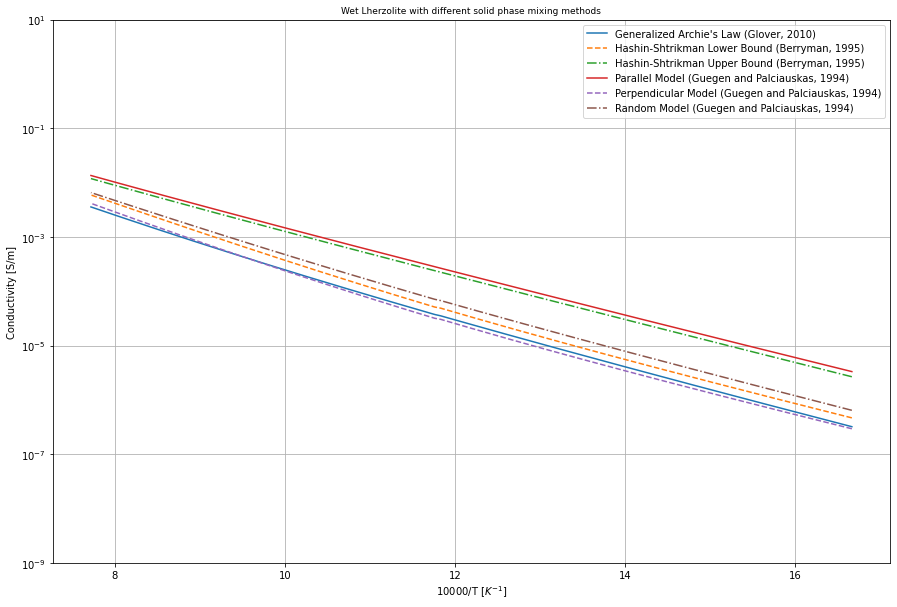

In [6]:
cond_lists = []
for i in range(0,len(mixing_list)):
	p_obj.set_solid_phs_mix_method(method = i)
	cond = p_obj.calculate_conductivity()
	cond_lists.append(cond)
    
lines = ['-','--','-.','-','--','-.','-','--','-.','-','--','-.','-','--','-.']

fig = plt.figure(figsize = (15,10))
ax = plt.subplot(111)
for i in range(0,len(mixing_list)):
	ax.plot(1e4/temp, cond_lists[i], label = mixing_list[i], linestyle = lines[i])
ax.set_yscale('log')
ax.set_xlabel('10000/T [$K^{-1}$]')
ax.set_ylabel('Conductivity [S/m]')
ax.grid(which = 'both')
ax.legend(fontsize = 10)
ax.set_title('Wet Lherzolite with different solid phase mixing methods',fontsize = 9)
ax.set_ylim((1e-9,10))

Now let's try to calculate the same situation considering there is some melt in the matrix. First, let's set up the solid environment and calculate

In [7]:
#Starting the new calculation space by resetting the object. Alternatively, one can also create a new pide object to
#perform calculations. However, using the same object can cause mismatches between array lengths that are assigned
#before.
p_obj.reset()

#setting up the new thermodynamic and compositional environment at higher tempeartures
temp_melt = np.arange(1300,1800,5)
p_obj.set_temperature(temp_melt)
p_obj.set_pressure(3.0)
p_obj.set_composition_solid_mineral(ol = 0.6,opx = 0.25,cpx = 0.1, garnet = 0.05)
p_obj.set_phase_interconnectivities(ol = 1, opx = 2, cpx = 4, gt = 4)
p_obj.set_mantle_water_partitions(opx_ol = 3, cpx_ol = 6, garnet_ol = 0)

#Setting bulk water(hydroxyl(OH^-1)) content to 1,000 ppm H2O wt and distributing the water content.
p_obj.set_bulk_water(0)
p_obj.mantle_water_distribute()

#Setting up the solid mixing as H-S lower bound for comparison with melt-bearing composition.
p_obj.set_solid_phs_mix_method(method = 1) #H-S lower bound

#calculating the conductivity of solid matrix
cond_solid_dry_matrix_hT = p_obj.calculate_conductivity()
p_obj.set_bulk_water(1000)
p_obj.mantle_water_distribute()
cond_solid_wet_matrix_hT = p_obj.calculate_conductivity()

Let's list the available melt mixing methods

Now let's set up the environment for melt inclusion in the calculations. In pide, melt or fluid (free fluid or water, not to be confused with $OH^-$) cannot exist at the same time for the same object.So, the user has to choose whether they want to calculate a melt-bearing or fluid-bearing environment. 

In [8]:
p_obj.set_melt_or_fluid_mode(mode = 'melt')
melt_frac = 0.02
p_obj.set_melt_fluid_frac(melt_frac)

Now, we want to form water ($OH^-$) partitioning coefficients between solid medium and melt. To calculat melt water content that is in equilibrium with the coexisting solid matrix, we first have to calcualate the $D_{melt/solid}^{OH^-}$:

$$D_{melt/solid}^{OH^-} = \sum \phi_{min} D_{melt/mineral}^{OH^-} \quad \text{(10)}$$

We can do this by first listing what is available at the library with the following method:

In [9]:
p_obj.list_mantle_water_partitions_melt('ol')
p_obj.list_mantle_water_partitions_melt('opx')
p_obj.list_mantle_water_partitions_melt('cpx')
p_obj.list_mantle_water_partitions_melt('garnet')

Mantle melt/NAMs water partition coefficients for the mineral:   ol
0.   Hirschmann2009_OlMelt  -  Type  0   -   Ol/Melt :  0.0017
1.   Tenner2012_OlMelt  -  Type  0   -   Ol/Melt :  0.0085
Mantle melt/NAMs water partition coefficients for the mineral:   opx
0.   Hirschmann2009_OpxMelt  -  Type  1   -  Specific Function.
1.   Tenner2012_OpxMelt  -  Type  0   -   Opx/Melt :  0.00515
2.   Novella2014_OpxMelt  -  Type  1   -  Specific Function.
Mantle melt/NAMs water partition coefficients for the mineral:   cpx
0.   Hirschmann2009_CpxMelt  -  Type  1   -  Specific Function.
1.   Tenner2012_CpxMelt  -  Type  0   -   Cpx/Melt :  0.00515
2.   OLeary2010_CpxMelt1  -  Type  0   -   Cpx/Melt :  0.0477
3.   OLeary2010_CpxMelt2  -  Type  0   -   Cpx/Melt :  0.0228
4.   OLeary2010_CpxMelt3  -  Type  0   -   Cpx/Melt :  0.0071
5.   OLeary2010_CpxMelt4  -  Type  0   -   Cpx/Melt :  0.0045
Mantle melt/NAMs water partition coefficients for the mineral:   garnet
0.   Novella2014_GtMelt  -  Type  0   -

['Novella2014_GtMelt', 'Hauri2006_GtMelt']

In [10]:
#Then we can choose these by setting up the partition coefficients:
p_obj.set_mantle_water_partitions(opx_ol = 3, cpx_ol = 6, garnet_ol = 0, ol_melt = 1, opx_melt = 1,
                                  cpx_melt = 1, garnet_melt = 0)

After water partition coefficients are set, we can calculate the water content of the system by following equation:

$$C_w^{melt} = C_w^{bulk} / (\phi_{melt}^{mass} + ((1-\phi_{melt}^{mass}) D_{melt/solid}^{OH^-}) \quad \text{(11)}$$

where melt mass fraction ($\phi_{melt}^{mass}$) is not the same as melt fraction ($\phi_{melt}$), which would be used in solid/melt mixing functions and will be dependent on density of the melt and the solid matrix. $\phi_{melt}$ can be calculated from:

$$\phi_{melt} = 1 / (1 + (\frac{1}{\phi_{melt}^{mass} -1} \frac{\rho_{melt}}{\rho_{solid}}) \quad \text{(12)}$$

All of these calculations are automatically made when the user runs the function **mantle_water_distribute** with a composition setup in the object.



In [11]:
p_obj.mantle_water_distribute()

Now, that we set up the environment with melt inside, we can calculate the conductivity of the system. However, we first have to set up the solid/melt mixing function first. The solid melt mixing functions implemented in ***pide*** are:

$$\sigma = \sigma_{solid} (1-\phi_{melt}^p) + (\sigma_{melt})  \phi_{melt}^m \quad \text{(13)} \quad \text{Modified Archie's Law} $$
$$p = log(1 - \sigma_{melt} * \phi_{melt}**m) / log(1 - \phi_{melt}) $$

$$\sigma = (\frac{1}{3} \phi_{melt} \sigma_{melt}) + ((1-\phi_{melt}) \sigma_{solid}) \quad \text{(15)} \quad \text{Tubes Model}$$

$$\sigma = \sigma_{melt} + \frac{(1-\phi_{melt})}{1/(\sigma_{solid} - \sigma_{melt}) + \phi_{melt}/3\sigma_{melt})} \quad \text{(16)} \quad \text{Spheres Model}$$

$$\sigma = \sigma_{melt}\frac{(\sigma_{melt}(\phi_{melt}^{2/3}-1) - \sigma_{solid}\phi_{melt}^{2/3})}{\sigma_{solid}(\phi_{melt} - \phi_{melt}^{2/3}) + \sigma_{melt} (\phi_{melt}^{2/3} - \phi_{melt} -1)} \quad \text{(17)}\quad\text{Modified Brick-Layer Model}$$

$$\sigma = \sigma_{melt} (1 - \frac{3(1-\phi_{melt})(\sigma_{melt}-\sigma_{solid})}{3 \sigma_{melt} - \phi_{melt}(\sigma_{melt}-\sigma_{solid})}) \quad \text{(18)} \quad \text{Hashin-Shtrikman Upper Bound}$$

$$\sigma = \sigma_{solid} (1 + \frac{3\phi_{melt}(\sigma_{melt}\sigma_{solid})}{3\sigma_{solid} + (1-\phi_{melt})(\sigma_{melt}-\sigma_{solid})}) \quad \text{(19)} \quad \text{Hashin-Shtrikman Lower Bound}$$

In [12]:
melt_mixing_lists = p_obj.list_phs_melt_fluid_mix_methods()

#setting up interconnectivity for modifier Archie's Law (exponent m)
p_obj.set_melt_fluid_interconnectivity(2.0)

Solid-Fluid/Melt Mixing models:
0.   Modified Archie's Law (Glover et al., 2000)
1.   Tubes Model (ten Grotenhuis et al., 2005)
2.   Spheres Model (ten Grotenhuis et al., 2005)
3.   Modified Brick-layer Model (Schilling et al., 1997)
4.   Hashin-Shtrikman Upper-Bound (Glover et al., 2000)
5.   Hashin-Shtrikman Lower-Bound (Glover et al., 2000)


In [13]:
cond_melt_lists = []

for i in range(0,len(melt_mixing_lists)):

	p_obj.set_solid_melt_fluid_mix_method(method = i)
	cond = p_obj.calculate_conductivity()

	cond_melt_lists.append(cond)

In [14]:
cond_melt = p_obj.calculate_melt_conductivity()

(1e-05, 100)

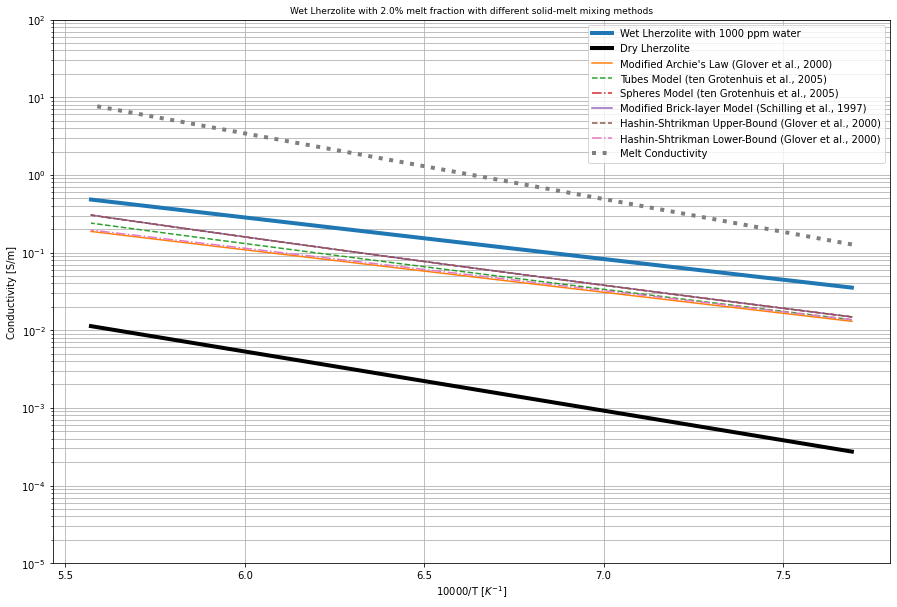

In [15]:
lines = ['-','--','-.','-','--','-.','-','--','-.','-','--','-.','-','--','-.']

fig = plt.figure(figsize = (15,10))


ax2 = plt.subplot(111)
ax2.plot(1e4/temp_melt, cond_solid_wet_matrix_hT, label = 'Wet Lherzolite with 1000 ppm water', linestyle = '-',linewidth = 4)
ax2.plot(1e4/temp_melt, cond_solid_dry_matrix_hT, label = 'Dry Lherzolite', linestyle = '-',linewidth = 4,color = 'k')
for i in range(0,len(mixing_list)):
	ax2.plot(1e4/temp_melt, cond_melt_lists[i], label = melt_mixing_lists[i], linestyle = lines[i])
	
ax2.plot(1e4/temp_melt, cond_melt, label = 'Melt Conductivity', linestyle = ':',linewidth = 4)

ax2.set_yscale('log')
ax2.set_xlabel('10000/T [$K^{-1}$]')
ax2.set_ylabel('Conductivity [S/m]')
ax2.grid(which = 'both')
ax2.legend(fontsize = 10)
ax2.set_title('Wet Lherzolite with ' +str(melt_frac*100) + '% melt fraction'' with different solid-melt mixing methods',fontsize = 9)
ax2.set_ylim((1e-5,100))

This result rather illustrates the unprecedendent effect of melt on electrical conductivity. In this example, even though the melt is more conductive than the solid matrix, the resulting bulk conductivity with melt is actually lower than the hydrous rock with same bulk water content. This is due to the incredibly high partitioning rate towards melt of volatiles. So, in terms of conductivity, there will be a delicate equilibrium between, bulk water content, melt $CO_2$, and melt fraction.